# 3. Feature Engineering

In [78]:
#!pip install folium

In [79]:
import os
import pickle
import folium
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import where
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.image as mpimg

pd.options.display.max_columns = 1000

In [80]:
sns.set_style('whitegrid')
warnings.filterwarnings("ignore")

In [81]:
Data = pd.read_csv('../data/TRAIN_SET_2021_cleaned.csv', header = 0)
Data.shape

(15587, 30)

In [82]:
# Data = Data.drop_duplicates(keep='first')
Data.columns

Index(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'RESTAURANT_CATEGORY',
       'ADDRESS', 'CITY', 'STATE', 'ZIP', 'CURRENT_DEMERITS', 'CURRENT_GRADE',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TIME', 'INSPECTION_TYPE', 'INSPECTION_DEMERITS',
       'VIOLATIONS_RAW', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION',
       'SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW', 'LAT', 'LONG'],
      dtype='object')

- 17 features that can affect the prediction results                  

In [83]:
continuous_features = ['LAT', 'LONG', 'CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', 'INSPECTION_DEMERITS', 'FIRST_VIOLATION', 'SECOND_VIOLATION', 'THIRD_VIOLATION', 'NUMBER_OF_VIOLATIONS']
categorical_features = ['CURRENT_GRADE','RESTAURANT_CATEGORY', 'INSPECTION_TYPE', 'FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE']

- Targets: Next Inspection Grade C or Under C

In [84]:
target_feature = ['NEXT_INSPECTION_GRADE_C_OR_BELOW']

In [85]:
Data[target_feature + continuous_features]

,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,NUMBER_OF_VIOLATIONS
0,0,36.122144,115.165275,0.0,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,4.0
1,0,36.218691,115.242913,3.0,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,5.0
2,1,36.249892,115.244138,8.0,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,3.0
3,0,36.183669,115.112355,0.0,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,3.0
4,0,36.110083,115.153871,0.0,10.0,21.980282,13.462786,5.0,214.0,230.0,233.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15582,0,36.114321,115.170866,1.0,24.0,27.265494,1.858442,10.0,2.0,19.0,31.0,5.0
15583,0,36.216522,115.118967,6.0,21.0,18.216549,6.797710,7.0,213.0,225.0,230.0,5.0
15584,0,36.128207,115.173008,9.0,6.0,32.334711,2.341416,17.0,209.0,213.0,217.0,5.0
15585,0,35.991519,114.830906,3.0,11.0,36.076705,1.278035,7.0,214.0,215.0,226.0,3.0


### 3.1 Continuous Features

In [86]:
Features_con = Data[continuous_features]
y = Data[['NEXT_INSPECTION_GRADE_C_OR_BELOW']]
Features_con.shape

(15587, 11)

In [87]:
Features_con.isna().sum()

LAT                       0
LONG                      0
CURRENT_DEMERITS          0
EMPLOYEE_COUNT            0
MEDIAN_EMPLOYEE_AGE       0
MEDIAN_EMPLOYEE_TENURE    0
INSPECTION_DEMERITS       0
FIRST_VIOLATION           0
SECOND_VIOLATION          0
THIRD_VIOLATION           0
NUMBER_OF_VIOLATIONS      0
dtype: int64

In [88]:
Features_con.head()

,LAT,LONG,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,NUMBER_OF_VIOLATIONS
0,36.122144,115.165275,0.0,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,4.0
1,36.218691,115.242913,3.0,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,5.0
2,36.249892,115.244138,8.0,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,3.0
3,36.183669,115.112355,0.0,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,3.0
4,36.110083,115.153871,0.0,10.0,21.980282,13.462786,5.0,214.0,230.0,233.0,5.0


In [124]:
Features_con.describe()

,LAT,LONG,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,NUMBER_OF_VIOLATIONS
count,15587.000000,15587.000000,15587.000000,15587.000000,15587.000000,15587.000000,15587.000000,15587.000000,15587.000000,15587.000000,15587.000000
mean,36.110784,113.201583,5.015654,15.031821,28.010619,4.024738,13.521460,165.987297,172.270674,179.572079,5.727850
std,0.682603,20.947183,4.685161,8.941180,4.892449,1.998934,8.434254,80.758935,79.797306,77.126913,3.004526
min,0.000000,-115.307572,0.000000,3.000000,18.000000,0.227197,0.000000,1.000000,2.000000,4.000000,3.000000
25%,36.098731,115.116348,0.000000,8.000000,24.607232,2.573311,8.000000,202.000000,205.000000,209.000000,4.000000
50%,36.120601,115.168773,5.000000,14.000000,27.965974,3.694684,10.000000,206.000000,211.000000,215.000000,5.000000
75%,36.160997,115.201984,8.000000,21.000000,31.388519,5.101903,19.000000,211.000000,215.000000,227.000000,7.000000
max,52.157900,115.679632,89.000000,53.000000,49.614076,16.481163,86.000000,301.000000,302.000000,310.000000,42.000000


### 3.2 Categorical Features and OrdinalEncoder

The categorical feature is ordinal (like primary school, high school). The number of categories is quite large so that OrdinalEncoder can be more effective and OneHotEncoder can lead to high memory consumption.

In [89]:
from sklearn.preprocessing import OrdinalEncoder

In [90]:
Features_cate = Data[categorical_features]
Features_cate.shape

(15587, 6)

In [91]:
Features_cate.isna().sum()

CURRENT_GRADE            0
RESTAURANT_CATEGORY      0
INSPECTION_TYPE          0
FIRST_VIOLATION_TYPE     0
SECOND_VIOLATION_TYPE    0
THIRD_VIOLATION_TYPE     0
dtype: int64

In [92]:
OrdinalEncoder().fit(Features_cate).categories_

[array(['A', 'B', 'C', 'N', 'O', 'X'], dtype=object),
 array(['Bakery Sales', 'Banquet Kitchen', 'Banquet Support',
        'Bar / Tavern', 'Barbeque', 'Beer Bar', 'Buffet', 'Caterer',
        'Childcare Kitchens', 'Concessions', 'Confection',
        'Elementary School Kitchen', 'Farmers Market',
        'Food Trucks / Mobile Vendor', 'Garde Manger', 'Gas Station',
        'Gastropub', 'Grocery Store Sampling',
        'Institutional Food Service', 'Kitchen Bakery', 'Main Kitchen',
        'Meat/Poultry/Seafood', 'Pantry', 'Portable Bar', 'Portable Unit',
        'Produce Market', 'Restaurant', 'Self-Service Food Truck',
        'Snack Bar', 'Special Kitchen', 'Vegetable Prep'], dtype=object),
 array(['Re-inspection', 'Routine Inspection'], dtype=object),
 array(['Critical', 'Imminent Health Hazard', 'Major', 'Non-Major'],
       dtype=object),
 array(['Critical', 'Imminent Health Hazard', 'Major', 'Non-Major'],
       dtype=object),
 array(['Critical', 'Imminent Health Hazard', 'Majo

In [93]:
Features_cate.iloc[:,:] = OrdinalEncoder().fit_transform(Features_cate.iloc[:,:])
Features_cate.head()

,CURRENT_GRADE,RESTAURANT_CATEGORY,INSPECTION_TYPE,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE
0,0,28,1,0,2,1
1,0,26,1,2,2,3
2,0,26,1,0,2,3
3,0,11,1,2,3,3
4,0,3,1,2,3,3


### 3.3 Feature Selection

In [94]:
Features = pd.concat([Features_con, Features_cate],axis = 1)
Features = Features.astype(np.float)
Features.shape

(15587, 17)

In [95]:
Features.head(10)

,LAT,LONG,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,NUMBER_OF_VIOLATIONS,CURRENT_GRADE,RESTAURANT_CATEGORY,INSPECTION_TYPE,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE
0,36.122144,115.165275,0.0,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,4.0,0.0,28.0,1.0,0.0,2.0,1.0
1,36.218691,115.242913,3.0,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,5.0,0.0,26.0,1.0,2.0,2.0,3.0
2,36.249892,115.244138,8.0,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,3.0,0.0,26.0,1.0,0.0,2.0,3.0
3,36.183669,115.112355,0.0,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,3.0,0.0,11.0,1.0,2.0,3.0,3.0
4,36.110083,115.153871,0.0,10.0,21.980282,13.462786,5.0,214.0,230.0,233.0,5.0,0.0,3.0,1.0,2.0,3.0,3.0
5,36.102719,115.201984,3.0,43.0,25.947206,3.839934,17.0,206.0,211.0,215.0,7.0,0.0,3.0,1.0,0.0,2.0,2.0
6,36.112050,115.314812,6.0,10.0,32.910780,2.673364,10.0,14.0,28.0,31.0,4.0,0.0,26.0,1.0,2.0,3.0,3.0
7,36.097782,115.119856,0.0,14.0,34.199497,4.766880,20.0,209.0,212.0,217.0,12.0,0.0,26.0,1.0,0.0,2.0,2.0
8,35.978591,114.832485,3.0,34.0,33.321615,6.256492,7.0,215.0,223.0,226.0,3.0,0.0,26.0,1.0,2.0,2.0,3.0
9,36.112358,115.170221,9.0,24.0,23.007905,2.450029,9.0,211.0,215.0,230.0,5.0,0.0,22.0,1.0,2.0,2.0,3.0


<AxesSubplot:>

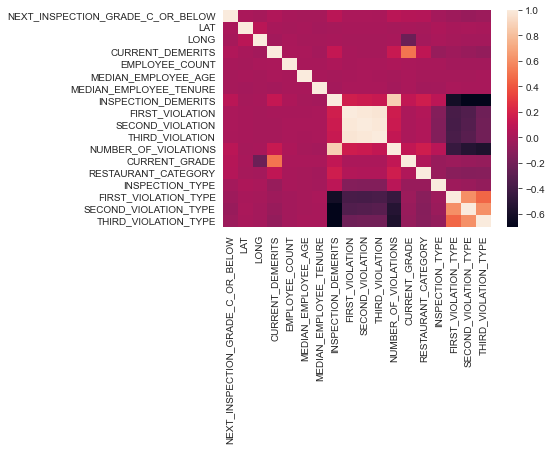

In [96]:
sns.heatmap( pd.concat([Data[target_feature], Features],axis = 1).corr())

### 3.4 Normalization

Machine learning algorithms like Linear Regression and Gaussian Naive Bayes assume the numerical variables have a Gaussian probability distribution. That's why we need data transformation. 

Standard Scaler doesn't have predetermined range, which is the first option for most cases. 

Be careful: Never fit for validation and test set.

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

Features_norm = Features.copy()
Features_norm.iloc[:,:] = scaler.fit_transform(Features.iloc[:,:])

In [99]:
Features_norm.head()

,LAT,LONG,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,NUMBER_OF_VIOLATIONS,CURRENT_GRADE,RESTAURANT_CATEGORY,INSPECTION_TYPE,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE
0,0.016642,0.093748,-1.070575,1.114897,-0.010350,4.492612,-0.298964,0.470709,0.535490,1.587408,-0.575101,-0.138519,0.673370,0.242396,-1.029635,0.092611,-1.795910
1,0.158086,0.097454,-0.430235,-0.898324,-0.059533,-0.051355,-0.536100,0.594538,0.548023,0.640885,-0.242259,-0.138519,0.452037,0.242396,0.740109,0.092611,0.862733
2,0.203797,0.097513,0.636999,0.891206,-0.320501,3.145797,-0.536100,0.445943,0.535490,0.692750,-0.907943,-0.138519,0.452037,0.242396,-1.029635,0.092611,0.862733
3,0.106778,0.091221,-1.070575,-0.115405,1.221855,0.069657,-1.010372,0.594538,0.723473,0.692750,-0.907943,-0.138519,-1.207958,0.242396,0.740109,1.072608,0.862733
4,-0.001028,0.093204,-1.070575,-0.562787,-1.232620,4.721692,-1.010372,0.594538,0.723473,0.692750,-0.242259,-0.138519,-2.093288,0.242396,0.740109,1.072608,0.862733


# 4. Classification and Prediction

This is a classification and prediction problem (Supervised Learning). We want to identify relationship between output (Inspection garde below C or not) with other variables or features. The classification models which are going to be tested include:
- Logistic Regression
- Decision Tree
- Random Forest
- KNN or k-Nearest Neighbors
- Naive Bayes classifier
- Support Vector Machines
- Artificial neural network

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = Features_norm.copy()
y = Data[target_feature].copy()
print(X.shape)
print(y.shape)

(15587, 17)
(15587, 1)


In [102]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(12469, 17) (12469, 1)
(3118, 17) (3118, 1)


### 4.1 Data Balance

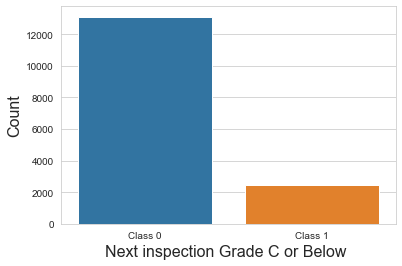

In [103]:
g = sns.countplot(y['NEXT_INSPECTION_GRADE_C_OR_BELOW'])
g.set_xticklabels(['Class 0','Class 1'])
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Next inspection Grade C or Below ', fontsize = 16)
plt.show()

Our dataset presents highly imbalance. We can use Synthetic Minority Oversampling Technique (SMOTE) to resample the data

In [104]:
!pip install imbalanced-learn

In [105]:
# try to use groupby and .sample on the length of majority class

In [106]:
import imblearn
from numpy import mean
from imblearn.over_sampling import SMOTE

In [107]:
smote = SMOTE(random_state=32)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train['NEXT_INSPECTION_GRADE_C_OR_BELOW']))
print('Resample dataset shape', Counter(y_smote['NEXT_INSPECTION_GRADE_C_OR_BELOW']))

Original dataset shape Counter({0: 10481, 1: 1988})
Resample dataset shape Counter({0: 10481, 1: 10481})


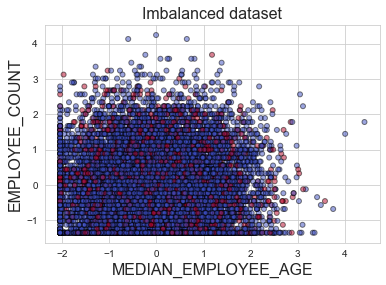

In [108]:
plt.title('Imbalanced dataset',fontsize = 16)
plt.xlabel('MEDIAN_EMPLOYEE_AGE',fontsize = 16)
plt.ylabel('EMPLOYEE_COUNT',fontsize = 16)
plt.scatter(X_train['MEDIAN_EMPLOYEE_AGE'], X_train['EMPLOYEE_COUNT'], marker='o', c=y_train['NEXT_INSPECTION_GRADE_C_OR_BELOW'], s=25, edgecolor='k', cmap=plt.cm.coolwarm,alpha = 0.5)
plt.show()

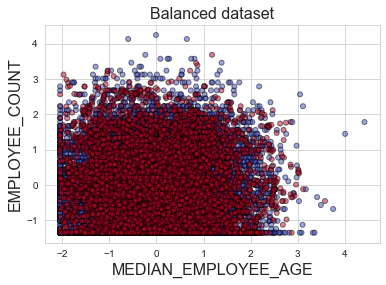

In [109]:
plt.title('Balanced dataset',fontsize = 16)
plt.xlabel('MEDIAN_EMPLOYEE_AGE',fontsize = 16)
plt.ylabel('EMPLOYEE_COUNT',fontsize = 16)
plt.scatter(X_smote['MEDIAN_EMPLOYEE_AGE'], X_smote['EMPLOYEE_COUNT'], marker='o', c=y_smote['NEXT_INSPECTION_GRADE_C_OR_BELOW'], s=25, edgecolor='k', cmap=plt.cm.coolwarm,alpha=0.5)
plt.show()

In [110]:
X_train = X_smote
y_train = y_smote

### 4.2 Modeling

In [34]:
# not actually care on the train set. must try it on test set.
# do care about F-1 score, which tell me everything I need to know.
# hypertable: model name...
# draft the report
# let model do feature selection (like with regularization) not mannualy. give as many as feature i can

In [35]:
# residue plot for each feature for how well each feature is related to the target (error and truth)
# for my case, logistics regression, use probability to plot residue plot scatter

KFold cross validation and GridSearch are used as a help for the model selection.

F1-Score, which is the harmonic mean of precision (PRE) and recall (REC), is selected as a metrics for accuracy of classification.

<img src="../references/Metrics.jpg" width="700" height="300">

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, average_precision_score 

from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
hypertable = []

### 4.2.1 Logistic Regression

In [38]:
logreg = LogisticRegression()
model_name = logreg.__class__.__name__
param_grid = [ {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'C' : [0.001,0.1,1,100,1000], 
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [1, 100, 1000, 2500]}]
logreg = GridSearchCV(logreg, param_grid = param_grid, cv = 3, n_jobs=-1)
logreg = logreg.fit(X_train, y_train)
logreg.best_estimator_

LogisticRegression(C=0.001, max_iter=1, penalty='none', solver='sag')

In [73]:
y_pred_val = logreg.best_estimator_.predict(X_val)
y_pred_train = logreg.best_estimator_.predict(X_train)

y_pred_proba_val = logreg.best_estimator_.predict_proba(X_val)
y_pred_proba_train = logreg.best_estimator_.predict_proba(X_train)

logreg_scaled_val  = accuracy_score(y_val, y_pred_val)
logreg_scaled_train  = accuracy_score(y_train, y_pred_train)
f1_logreg_scaled_val  =  f1_score(y_val, y_pred_val, average='micro')
f1_logreg_scaled_train  =  f1_score(y_train, y_pred_train, average='micro')

print("The Logistic Regression Accuracy Score is {}".format(logreg_scaled_val))
print("The Logistic Regression F-1 Score is {}".format(f1_logreg_scaled_val))
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

The Logistic Regression Accuracy Score is 0.5894804361770366
The Logistic Regression F-1 Score is 0.5894804361770366
[[1616 1016]
 [ 264  222]]
              precision    recall  f1-score   support

           0       0.86      0.61      0.72      2632
           1       0.18      0.46      0.26       486

    accuracy                           0.59      3118
   macro avg       0.52      0.54      0.49      3118
weighted avg       0.75      0.59      0.64      3118



In [71]:
logreg.best_estimator_.predict_proba(X_train)[:,1]

array([0.45675379, 0.54266771, 0.46041068, ..., 0.43082492, 0.49630974,
       0.49997767])

In [40]:
# Hypertable
results = {}
results['model'] = model_name
results['f1_train'] = f1_logreg_scaled_train
results['f1_val'] = f1_logreg_scaled_val
results['accuracy_score_train'] = logreg_scaled_train
results['accuracy_score_val'] = logreg_scaled_val
results['best_estimator'] = logreg.best_estimator_

hypertable.extend([results])
pd.DataFrame(hypertable).sort_values('f1_train',ascending=False)

,model,f1_train,f1_val,accuracy_score_train,accuracy_score_val,best_estimator
0,LogisticRegression,0.544032,0.58948,0.544032,0.58948,"LogisticRegression(C=0.001, max_iter=1, penalt..."


### 4.2.2 Decision Tree

In [43]:
decision_tree = DecisionTreeClassifier()
model_name = decision_tree.__class__.__name__
param_grid={'max_depth':[1,4,6],
            'min_samples_split':[4,5,6],
            'min_samples_leaf':[1,3,7,9],
            'criterion':['gini', 'entropy']}
decision_tree = GridSearchCV(decision_tree, param_grid = param_grid, cv = 3, n_jobs=-1)
decision_tree = decision_tree.fit(X_train, y_train)
decision_tree.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=9, min_samples_split=5)

In [183]:
y_pred_val = decision_tree.best_estimator_.predict(X_val)
y_pred_train = decision_tree.best_estimator_.predict(X_train)

y_pred_proba_val = decision_tree.best_estimator_.predict_proba(X_val)
y_pred_proba_train = decision_tree.best_estimator_.predict_proba(X_train)

decision_tree_scaled_val  = accuracy_score(y_val, y_pred_val)
decision_tree_scaled_train  = accuracy_score(y_train, y_pred_train)
f1_decision_tree_scaled_val  =  f1_score(y_val, y_pred_val, average='micro')
f1_decision_tree_scaled_train  =  f1_score(y_train, y_pred_train, average='micro')

print("The Decision Tree Accuracy Score is {}".format(decision_tree_scaled_val))
print("The Decision Tree F-1 Score is {}".format(f1_decision_tree_scaled_val))
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

The Decision Tree Accuracy Score is 0.8431686978832585
The Decision Tree F-1 Score is 0.8431686978832587
[[2629    3]
 [ 486    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2632
           1       0.00      0.00      0.00       486

    accuracy                           0.84      3118
   macro avg       0.42      0.50      0.46      3118
weighted avg       0.71      0.84      0.77      3118



In [45]:
# Hypertable
results = {}
results['model'] = model_name
results['f1_train'] = f1_decision_tree_scaled_train
results['f1_val'] = f1_decision_tree_scaled_val
results['accuracy_score_train'] = decision_tree_scaled_train
results['accuracy_score_val'] = decision_tree_scaled_val
results['best_estimator'] = decision_tree.best_estimator_

hypertable.extend([results])
pd.DataFrame(hypertable).sort_values('f1_val',ascending=False)

,model,f1_train,f1_val,accuracy_score_train,accuracy_score_val,best_estimator
1,DecisionTreeClassifier,0.642973,0.843169,0.642973,0.843169,"DecisionTreeClassifier(max_depth=6, min_sample..."
0,LogisticRegression,0.544032,0.589480,0.544032,0.589480,"LogisticRegression(C=0.001, max_iter=1, penalt..."


Text(0.5, 1.0, 'Val Residue Plot')

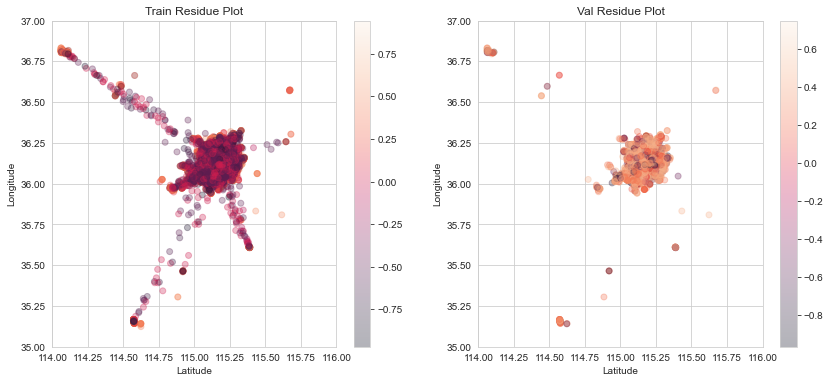

In [184]:
# Residue Plots
plt.figure(figsize=(14,6))

x_train_origin = pd.DataFrame(scaler.inverse_transform(X_train),columns = Features_norm.columns)
x_val_origin = pd.DataFrame(scaler.inverse_transform(X_val),columns = Features_norm.columns)

plt.subplot(121)
plt.scatter(x=x_train_origin['LONG'],y=x_train_origin['LAT'],c=(y_pred_proba_train[:,1].reshape(-1,1)-y_train).values,alpha=0.3) 
plt.colorbar()
plt.grid('on')
plt.xlim([114,116])
plt.ylim([35,37])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Train Residue Plot')

plt.subplot(122)
plt.scatter(x=x_val_origin['LONG'],y=x_val_origin['LAT'],c=(y_pred_proba_val[:,1].reshape(-1,1)-y_val).values,alpha=0.3) 
plt.colorbar()
plt.grid('on')
plt.xlim([114,116])
plt.ylim([35,37])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Val Residue Plot')

Text(0.5, 0.92, 'Train Residue Plot')

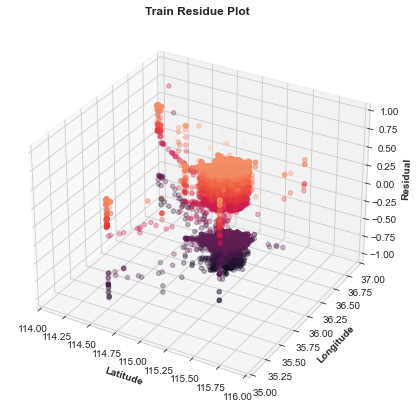

In [170]:
# Residue Plots
plt.figure(figsize=(10,7))
x_train_origin = pd.DataFrame(scaler.inverse_transform(X_train),columns = Features_norm.columns)
x_val_origin = pd.DataFrame(scaler.inverse_transform(X_val),columns = Features_norm.columns)


ax1 = plt.axes(projection ="3d")
ax1.scatter3D(xs=x_train_origin['LONG'],ys=x_train_origin['LAT'],zs=y_pred_proba_train[:,1].reshape(-1,1)-y_train,c=(y_pred_proba_train[:,1].reshape(-1,1)-y_train).values,alpha=0.3) 
plt.grid('on')
ax1.axes.set_xlim3d([114,116])
ax1.axes.set_ylim3d([35,37])
ax1.axes.set_xlabel('Latitude', fontweight ='bold')
ax1.axes.set_ylabel('Longitude', fontweight ='bold')
ax1.axes.set_zlabel('Residual', fontweight ='bold')
plt.title('Train Residue Plot', fontweight ='bold')


Text(0.5, 0.92, 'Val Residue Plot')

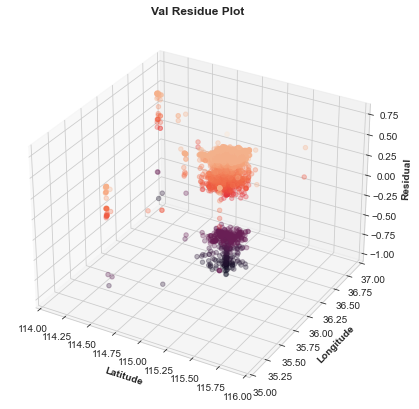

In [185]:
plt.figure(figsize=(10,7))
ax2 = plt.axes(projection ="3d")
ax2.scatter3D(xs=x_val_origin['LONG'],ys=x_val_origin['LAT'],zs=y_pred_proba_val[:,1].reshape(-1,1)-y_val,c=(y_pred_proba_val[:,1].reshape(-1,1)-y_val).values,alpha=0.3) 
plt.grid('on')
ax2.axes.set_xlim3d([114,116])
ax2.axes.set_ylim3d([35,37])
ax2.axes.set_xlabel('Latitude', fontweight ='bold')
ax2.axes.set_ylabel('Longitude', fontweight ='bold')
ax2.axes.set_zlabel('Residual', fontweight ='bold')
plt.title('Val Residue Plot', fontweight ='bold')

Text(0.5, 1.0, 'Val Residue Plot')

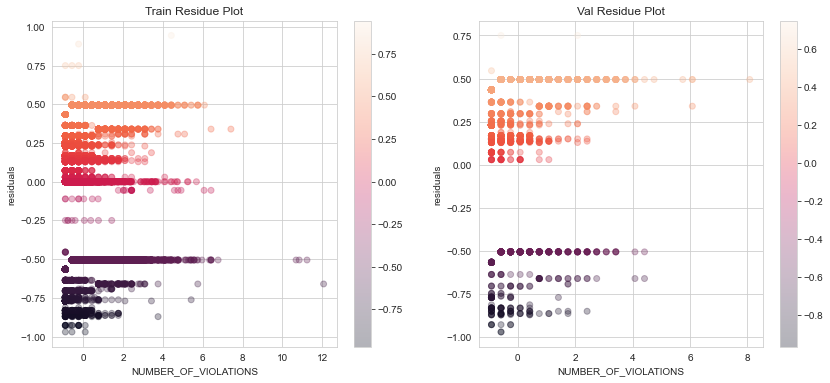

In [189]:
# Residue Plots
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.scatter(x=X_train['NUMBER_OF_VIOLATIONS'],y=y_pred_proba_train[:,1].reshape(-1,1)-y_train,c=(y_pred_proba_train[:,1].reshape(-1,1)-y_train).values,alpha=0.3) 
plt.colorbar()
plt.grid('on')
# plt.xlim([0,10000])
# plt.ylim([-1,1])
plt.xlabel('NUMBER_OF_VIOLATIONS')
plt.ylabel('residuals')
plt.title('Train Residue Plot')

plt.subplot(122)
plt.scatter(x=X_val['NUMBER_OF_VIOLATIONS'],y=y_pred_proba_val[:,1].reshape(-1,1)-y_val,c=(y_pred_proba_val[:,1].reshape(-1,1)-y_val).values,alpha=0.3) 
plt.colorbar()
plt.grid('on')
# plt.xlim([0,10000])
# plt.ylim([-1,1])
plt.xlabel('NUMBER_OF_VIOLATIONS')
plt.ylabel('residuals')
plt.title('Val Residue Plot')

### 4.2.3 Random Forest

In [46]:
random_forest = RandomForestClassifier()
model_name = random_forest.__class__.__name__
param_grid = {'max_depth': [3, 5, 7, 9],
              'max_features': [4, 6, 8, 10],
              'min_samples_leaf': [3, 5, 10, 15],
              'min_samples_split': [3, 4, 5, 6],
              'n_estimators': [10, 30, 60, 100]}
random_forest = GridSearchCV(random_forest, param_grid = param_grid, cv = 3, n_jobs=-1)
random_forest = random_forest.fit(X_train, y_train)
random_forest.best_estimator_

RandomForestClassifier(max_depth=9, max_features=4, min_samples_leaf=3,
                       min_samples_split=3)

In [179]:
y_pred_val = random_forest.best_estimator_.predict(X_val)
y_pred_train = random_forest.best_estimator_.predict(X_train)
random_forest_scaled_val  = accuracy_score(y_val, y_pred_val)
random_forest_scaled_train  = accuracy_score(y_train, y_pred_train)
f1_random_forest_scaled_val  =  f1_score(y_val, y_pred_val, average='micro')
f1_random_forest_scaled_train  =  f1_score(y_train, y_pred_train, average='micro')

print("The Random Forest Accuracy Score is {}".format(random_forest_scaled_val))
print("The Random Forest F-1 Score is {}".format(f1_random_forest_scaled_val))
print(confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))

The Random Forest Accuracy Score is 0.7610647851186658
The Random Forest F-1 Score is 0.7610647851186659
[[2265  367]
 [ 378  108]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2632
           1       0.23      0.22      0.22       486

    accuracy                           0.76      3118
   macro avg       0.54      0.54      0.54      3118
weighted avg       0.76      0.76      0.76      3118



In [48]:
# Hypertable
results = {}
results['model'] = model_name
results['f1_train'] = f1_random_forest_scaled_train
results['f1_val'] = f1_random_forest_scaled_val
results['accuracy_score_train'] = random_forest_scaled_train
results['accuracy_score_val'] = random_forest_scaled_val
results['best_estimator'] = random_forest.best_estimator_

hypertable.extend([results])
pd.DataFrame(hypertable).sort_values('f1_val',ascending=False)

,model,f1_train,f1_val,accuracy_score_train,accuracy_score_val,best_estimator
1,DecisionTreeClassifier,0.642973,0.843169,0.642973,0.843169,"DecisionTreeClassifier(max_depth=6, min_sample..."
2,RandomForestClassifier,0.826639,0.761065,0.826639,0.761065,"(DecisionTreeClassifier(max_depth=9, max_featu..."
0,LogisticRegression,0.544032,0.589480,0.544032,0.589480,"LogisticRegression(C=0.001, max_iter=1, penalt..."


In [180]:
rf = RandomForestClassifier()
importances = rf.fit(X_train,y_train).feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

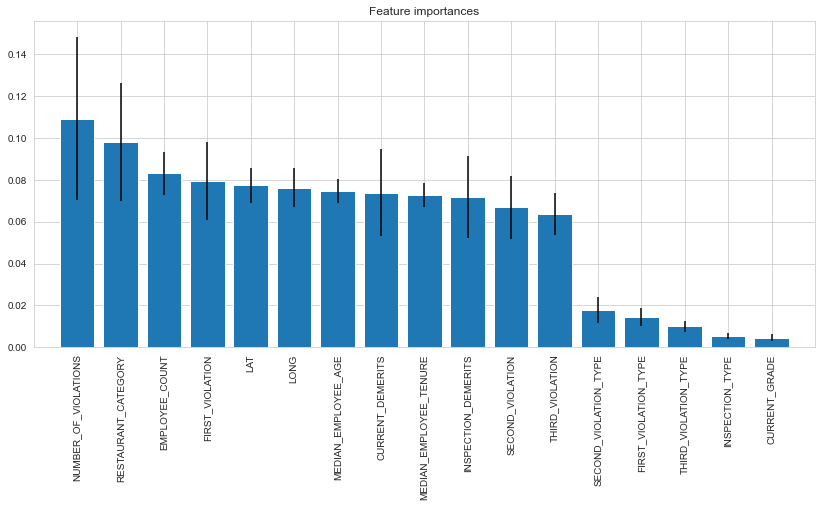

In [190]:
plt.figure(1, figsize=(14, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), Features.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### 4.2.4 K Nearest Neighbours

In [49]:
knn = KNeighborsClassifier()
model_name = knn.__class__.__name__
param_grid = {'n_neighbors': [5, 10, 20, 30],
                'p': [1,2,3],
                'leaf_size': [3, 5, 10, 15]} 
knn = GridSearchCV(knn, param_grid = param_grid, cv = 3, n_jobs=-1)
knn = knn.fit(X_train, y_train)
knn.best_estimator_

KNeighborsClassifier(leaf_size=3, p=1)

In [50]:
y_pred_val = knn.best_estimator_.predict(X_val)
knn_scaled_val  = accuracy_score(y_val,y_pred_val)
f1_knn_scaled_val  =  f1_score(y_val,y_pred_val, average='micro')
y_pred_train = knn.best_estimator_.predict(X_train)
knn_scaled_train  = accuracy_score(y_train,y_pred_train)
f1_knn_scaled_train  =  f1_score(y_train,y_pred_train, average='micro')

print("The K Nearest Neighbours Accuracy Score is {}".format(knn_scaled_val))
print("The K Nearest Neighbours F-1 Score is {}".format(f1_knn_scaled_val))
print(confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))

The K Nearest Neighbours Accuracy Score is 0.6157793457344451
The K Nearest Neighbours F-1 Score is 0.6157793457344451
[[1728  904]
 [ 294  192]]
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      2632
           1       0.18      0.40      0.24       486

    accuracy                           0.62      3118
   macro avg       0.51      0.53      0.49      3118
weighted avg       0.75      0.62      0.66      3118



In [51]:
# Hypertable
results = {}
results['model'] = model_name
results['f1_train'] = f1_knn_scaled_train
results['f1_val'] = f1_knn_scaled_val
results['accuracy_score_train'] = knn_scaled_train
results['accuracy_score_val'] = knn_scaled_val
results['best_estimator'] = knn.best_estimator_

hypertable.extend([results])
pd.DataFrame(hypertable).sort_values('f1_val',ascending=False)

,model,f1_train,f1_val,accuracy_score_train,accuracy_score_val,best_estimator
1,DecisionTreeClassifier,0.642973,0.843169,0.642973,0.843169,"DecisionTreeClassifier(max_depth=6, min_sample..."
2,RandomForestClassifier,0.826639,0.761065,0.826639,0.761065,"(DecisionTreeClassifier(max_depth=9, max_featu..."
3,KNeighborsClassifier,0.872913,0.615779,0.872913,0.615779,"KNeighborsClassifier(leaf_size=3, p=1)"
0,LogisticRegression,0.544032,0.589480,0.544032,0.589480,"LogisticRegression(C=0.001, max_iter=1, penalt..."


### 4.2.5 Naive Bayes

In [52]:
gaussian = GaussianNB()
model_name = gaussian.__class__.__name__
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=34)
acc_scores = cross_val_score(gaussian, X_train, y_train, cv = cv, scoring='accuracy')
gaussian.fit(X_train, y_train)
gaussian.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [53]:
y_pred_val = gaussian.predict(X_val)
nb_scaled_val  = accuracy_score(y_val,y_pred_val)
f1_nb_scaled_val  =  f1_score(y_val,y_pred_val, average='micro')
y_pred_train = gaussian.predict(X_train)
nb_scaled_train  = accuracy_score(y_train,y_pred_train)
f1_nb_scaled_train  =  f1_score(y_train,y_pred_train, average='micro')

print("The Naive Bayes Accuracy Score is {}".format(nb_scaled_val))
print("The Naive Bayes F-1 Score is {}".format(f1_nb_scaled_val))
print(confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))

The Naive Bayes Accuracy Score is 0.7658755612572161
The Naive Bayes F-1 Score is 0.7658755612572161
[[2278  354]
 [ 376  110]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2632
           1       0.24      0.23      0.23       486

    accuracy                           0.77      3118
   macro avg       0.55      0.55      0.55      3118
weighted avg       0.76      0.77      0.76      3118



In [54]:
# Hypertable
results = {}
results['model'] = model_name
results['f1_train'] = f1_nb_scaled_train
results['f1_val'] = f1_nb_scaled_val
results['accuracy_score_train'] = nb_scaled_train
results['accuracy_score_val'] = nb_scaled_val
results['best_estimator'] = gaussian.get_params()

hypertable.extend([results])
pd.DataFrame(hypertable).sort_values('f1_val',ascending=False)

,model,f1_train,f1_val,accuracy_score_train,accuracy_score_val,best_estimator
1,DecisionTreeClassifier,0.642973,0.843169,0.642973,0.843169,"DecisionTreeClassifier(max_depth=6, min_sample..."
4,GaussianNB,0.529243,0.765876,0.529243,0.765876,"{'priors': None, 'var_smoothing': 1e-09}"
2,RandomForestClassifier,0.826639,0.761065,0.826639,0.761065,"(DecisionTreeClassifier(max_depth=9, max_featu..."
3,KNeighborsClassifier,0.872913,0.615779,0.872913,0.615779,"KNeighborsClassifier(leaf_size=3, p=1)"
0,LogisticRegression,0.544032,0.589480,0.544032,0.589480,"LogisticRegression(C=0.001, max_iter=1, penalt..."


### 4.2.6 Gradient Boosting Classifier

In [55]:
gb = GradientBoostingClassifier()
model_name = gb.__class__.__name__
param_grid = {'n_estimators': [100, 200, 300, 500],
                'learning_rate': [0.01, 0.5, 1, 10],
                'max_depth': [1, 3, 5, 7]} 
gb = GridSearchCV(gb, param_grid = param_grid, cv = 3, n_jobs=-1)
gb = gb.fit(X_train, y_train)
gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.5)

In [56]:
y_pred_val = gb.best_estimator_.predict(X_val)
gb_scaled_val  = accuracy_score(y_val,y_pred_val)
f1_gb_scaled_val  =  f1_score(y_val,y_pred_val, average='micro')
y_pred_train = gb.best_estimator_.predict(X_train)
gb_scaled_train  = accuracy_score(y_train,y_pred_train)
f1_gb_scaled_train  =  f1_score(y_train,y_pred_train, average='micro')

print("The Gradient Boosting Accuracy Score is {}".format(gb_scaled_val))
print("The Gradient Boosting F-1 Score is {}".format(f1_gb_scaled_val))
print(confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))

The Gradient Boosting Accuracy Score is 0.8277742142398974
The Gradient Boosting F-1 Score is 0.8277742142398974
[[2561   71]
 [ 466   20]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2632
           1       0.22      0.04      0.07       486

    accuracy                           0.83      3118
   macro avg       0.53      0.51      0.49      3118
weighted avg       0.75      0.83      0.77      3118



In [57]:
# Hypertable
results = {}
results['model'] = model_name
results['f1_train'] = f1_gb_scaled_train
results['f1_val'] = f1_gb_scaled_val
results['accuracy_score_train'] = gb_scaled_train
results['accuracy_score_val'] = gb_scaled_val
results['best_estimator'] = gb.best_estimator_

hypertable.extend([results])
pd.DataFrame(hypertable).sort_values('f1_val',ascending=False)

,model,f1_train,f1_val,accuracy_score_train,accuracy_score_val,best_estimator
1,DecisionTreeClassifier,0.642973,0.843169,0.642973,0.843169,"DecisionTreeClassifier(max_depth=6, min_sample..."
5,GradientBoostingClassifier,0.905686,0.827774,0.905686,0.827774,([DecisionTreeRegressor(criterion='friedman_ms...
4,GaussianNB,0.529243,0.765876,0.529243,0.765876,"{'priors': None, 'var_smoothing': 1e-09}"
2,RandomForestClassifier,0.826639,0.761065,0.826639,0.761065,"(DecisionTreeClassifier(max_depth=9, max_featu..."
3,KNeighborsClassifier,0.872913,0.615779,0.872913,0.615779,"KNeighborsClassifier(leaf_size=3, p=1)"
0,LogisticRegression,0.544032,0.589480,0.544032,0.589480,"LogisticRegression(C=0.001, max_iter=1, penalt..."


### 4.2.7 Support Vector Machines

In [58]:
svc = SVC()
model_name = svc.__class__.__name__
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [0.01,0.1,10]},
              {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [0.01,0.1,10]},
              {'kernel': ['linear'], 'C': [0.01,0.1,10]}]
svc = GridSearchCV(svc, param_grid = param_grid, cv = 3, n_jobs=-1)
svc = svc.fit(X_train, y_train)
svc.best_estimator_

SVC(C=10, gamma=0.01)

In [59]:
y_pred_val = svc.best_estimator_.predict(X_val)
svc_scaled_val  = accuracy_score(y_val,y_pred_val)
f1_svc_scaled_val  =  f1_score(y_val,y_pred_val, average='micro')
y_pred_train = svc.best_estimator_.predict(X_train)
svc_scaled_train  = accuracy_score(y_train,y_pred_train)
f1_svc_scaled_train  =  f1_score(y_train,y_pred_train, average='micro')

print("The KNN Accuracy Score is {}".format(svc_scaled_val))
print("The KNN F-1 Score is {}".format(f1_svc_scaled_val))
print(confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))

The KNN Accuracy Score is 0.5529185375240538
The KNN F-1 Score is 0.5529185375240538
[[1474 1158]
 [ 236  250]]
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      2632
           1       0.18      0.51      0.26       486

    accuracy                           0.55      3118
   macro avg       0.52      0.54      0.47      3118
weighted avg       0.76      0.55      0.61      3118



In [60]:
# Hypertable
results = {}
results['model'] = model_name
results['f1_train'] = f1_svc_scaled_train
results['f1_val'] = f1_svc_scaled_val
results['accuracy_score_train'] = svc_scaled_train
results['accuracy_score_val'] = svc_scaled_val
results['best_estimator'] = svc.best_estimator_

hypertable.extend([results])
pd.DataFrame(hypertable).sort_values('f1_val',ascending=False)

,model,f1_train,f1_val,accuracy_score_train,accuracy_score_val,best_estimator
1,DecisionTreeClassifier,0.642973,0.843169,0.642973,0.843169,"DecisionTreeClassifier(max_depth=6, min_sample..."
5,GradientBoostingClassifier,0.905686,0.827774,0.905686,0.827774,([DecisionTreeRegressor(criterion='friedman_ms...
4,GaussianNB,0.529243,0.765876,0.529243,0.765876,"{'priors': None, 'var_smoothing': 1e-09}"
2,RandomForestClassifier,0.826639,0.761065,0.826639,0.761065,"(DecisionTreeClassifier(max_depth=9, max_featu..."
3,KNeighborsClassifier,0.872913,0.615779,0.872913,0.615779,"KNeighborsClassifier(leaf_size=3, p=1)"
0,LogisticRegression,0.544032,0.589480,0.544032,0.589480,"LogisticRegression(C=0.001, max_iter=1, penalt..."
6,SVC,0.594791,0.552919,0.594791,0.552919,"SVC(C=10, gamma=0.01)"


In [111]:
results = pd.DataFrame(hypertable).sort_values('f1_val',ascending=False)

In [112]:
# save the hypertable to a new csv file
from library.sb_utils import save_file
datapath = '../data'
save_file(results, 'results.csv', datapath)

Writing file.  "../data\results.csv"
